# Single Station Stacking

This notebook assumes that you have gone through the database creation and
can start using the traces at you disposal.

## Load a station into an RFStream

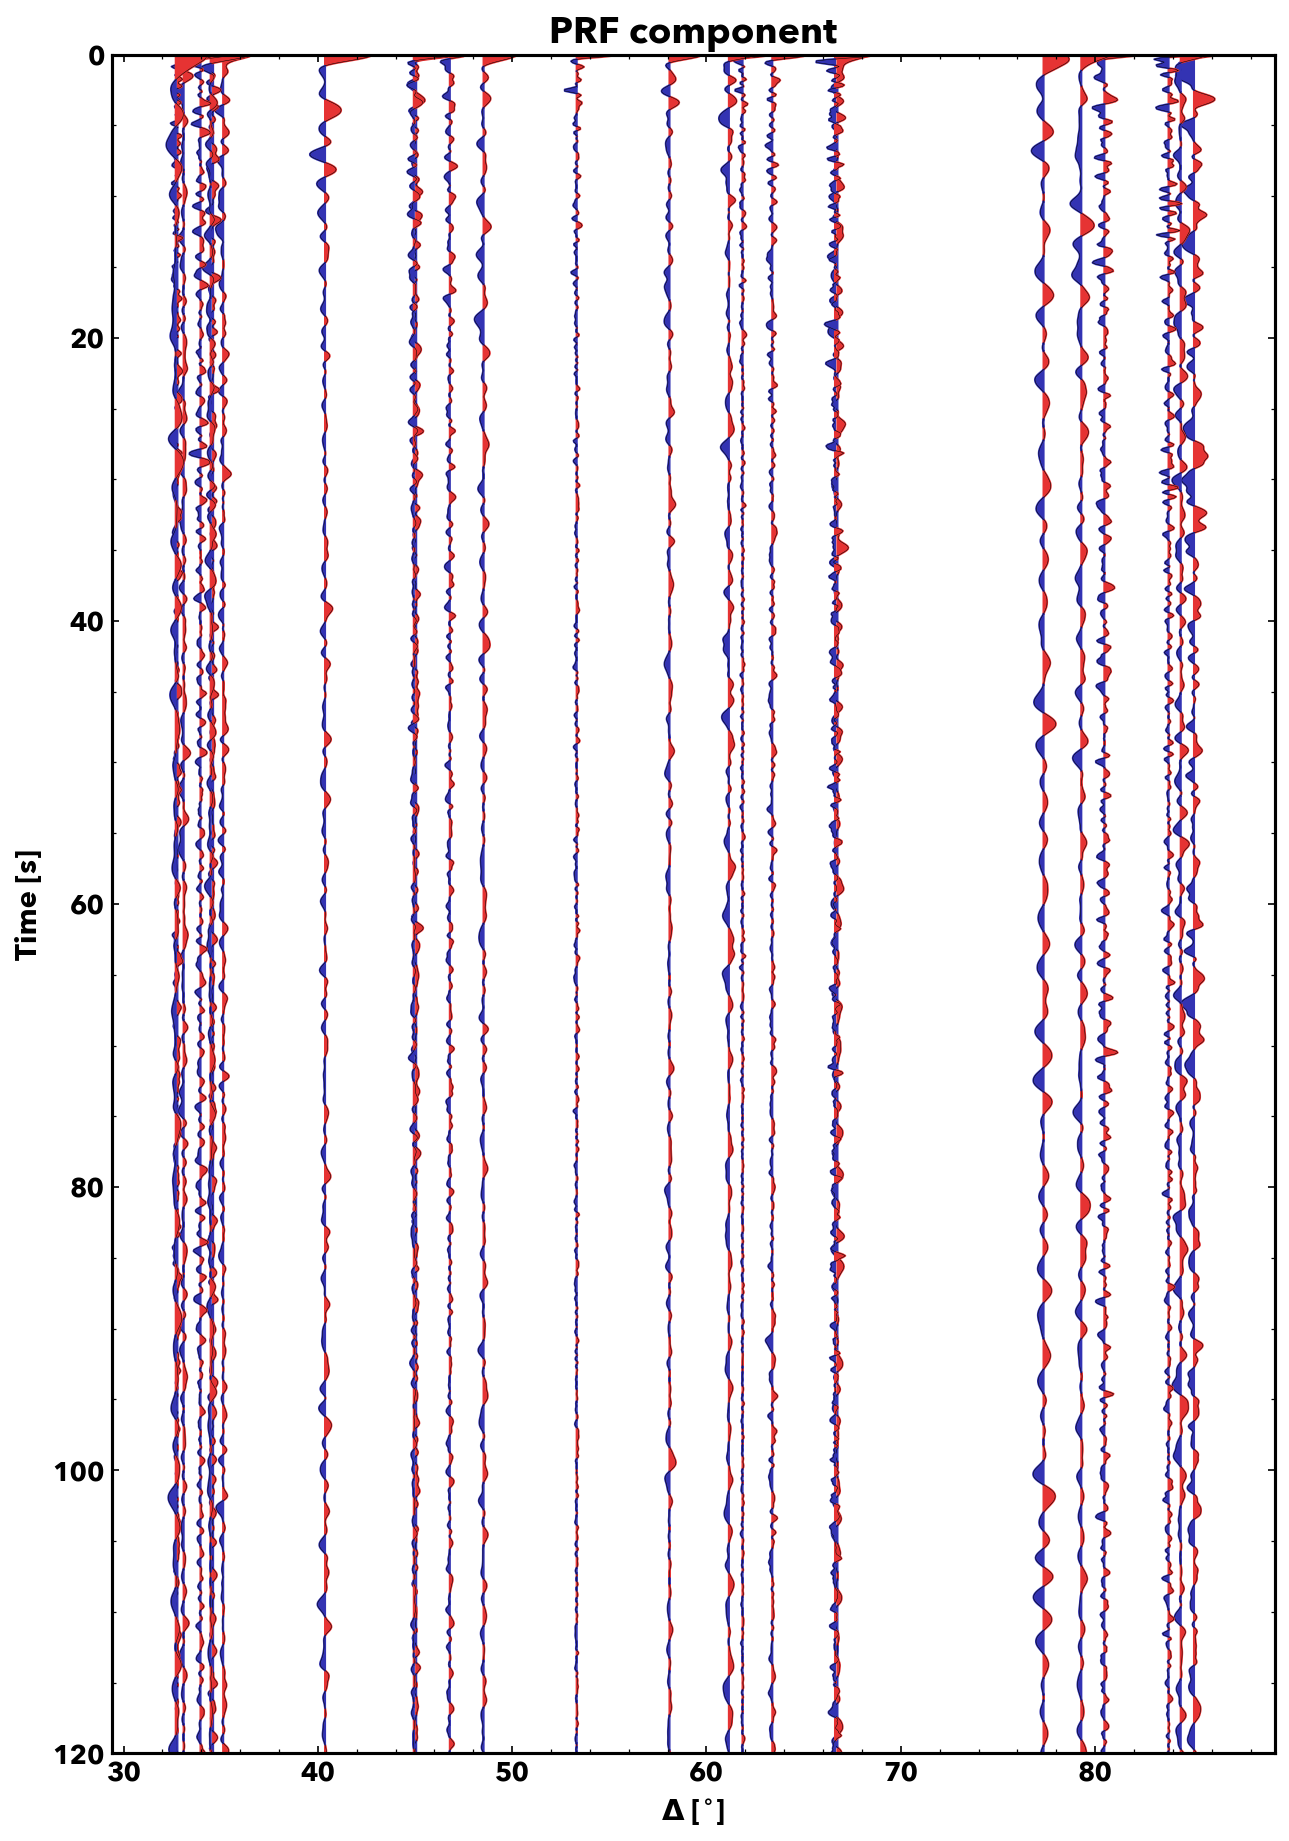

In [5]:
from pyglimer.rf.create import read_rf
from pyglimer.plot.plot_utils import set_mpl_params
set_mpl_params()

rfst = read_rf("database/RF/P/IU/HRV/*.sac")

# Check one Trace
rfst.plot()

## Moveout Correction

To stack the receiver functions, we need to perform moveout correction. To do this we use a
built-in velocity model. Here, `iasp91.dat`.

---
***NOTE:***
It is currently loaded from within the repo, therefore we change the path and back before doing anything.

---

In [2]:
import os
from pyglimer import RFStream 

def chdir(func, rpath=".."):
    def wrapper_chdir(*args, **kwargs):
        
        # Get dir
        cw = os.path.abspath(os.getcwd())
        print(os.path.abspath(os.getcwd()))        
        # Change dir
        os.chdir(os.path.join(cw, rpath))
        print(os.path.abspath(os.getcwd()))
        
        # Exectute function
        func(*args, **kwargs)
        
        # Change back
        os.chdir(cw)
        print(os.path.abspath(os.getcwd()))
        
    return wrapper_chdir

mymoveout = chdir(RFStream.moveout)
rfst.moveout = mymoveout
rfst.moveout(rfst, "iasp91.dat")

/Users/lucassawade/OneDrive/Research/PyGLImER/examples
/Users/lucassawade/OneDrive/Research/PyGLImER
/Users/lucassawade/OneDrive/Research/PyGLImER/examples


## Creating a single station stack

In [16]:
%load_ext autoreload
%autoreload 2

In [17]:
pwd

'/Users/lucassawade/OneDrive/Research/PyGLImER/examples'

In [ ]:
%reset

In [11]:
pwd

'/Users/lucassawade'

In [ ]:
os.cha